In [227]:
# Import all the Libraries required for the Data Analysis

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm

In [228]:
# Fetch Data and convert it into Dataframe for performing Data analysis

boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [229]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


# Task 4: Generate Descriptive Statistics and Visualizations

### For the "Median value of owner-occupied homes" provide a boxplot

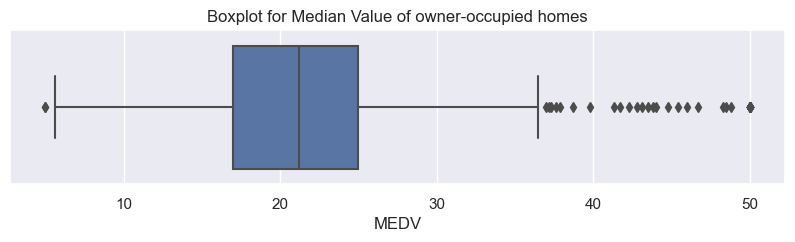

In [230]:
# Display a Boxplot for MEDV column.

from matplotlib.pyplot import figure
plt.figure(figsize=(10,2), dpi=100)
sns.boxplot(x=boston_df.MEDV)
plt.title("Boxplot for Median Value of owner-occupied homes")
plt.show()

__Remarks:__
_The Boxplot shown here corresponds to Median value of owner-occupied homes in $1000's and we can see that there are various outliers below the first quartile. The Median as per the BoxPlot is shown in the plot as approximately 21 or 22._

### Provide a  bar plot for the Charles river variable

Text(0.5, 1.0, 'Histogram for Charles river')

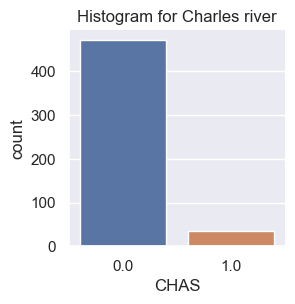

In [231]:
## Display a Histogram for the Charles River dummy variable which is a Dummy Variable.

sns.catplot(x='CHAS', kind='count', data = boston_df, height=3, aspect=83/80)
plt.title("Histogram for Charles river")

__Remarks__
_The Histogram shows the Frequency Distribution for Charles River dummy variable where (1 if tract bounds river, 0 otherwise)_

### Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

Text(0.5, 1.0, 'Boxplot for the MEDV variable vs the age_group')

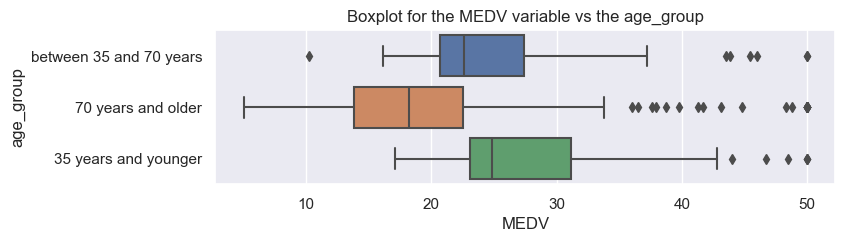

In [232]:
# Discretize the AGE column into three groups for Data analysis

boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

plt.figure(figsize=(8,2))
sns.boxplot(x=boston_df.MEDV, y=boston_df.age_group, data=boston_df)
plt.title("Boxplot for the MEDV variable vs the age_group")

__Conclusion:__
_The Boxplot corresponds to the three groups in the AGE column.<br>
The Median for the group "35 years and younger" is approximately 25, median for "70 years and older" is approximately 18 and median for group "Between 35 and 70 years" is approximately 22.<br>
The boxplot above shows that on average the median value of owner occupied homes is higher when the Age is lower.<br>
There are number of outliers for each category corrsponding to MEDV as well._

### Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

Text(0.5, 1.0, 'Relationship between NOX and INDUS')

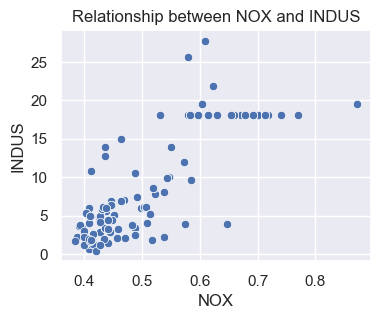

In [233]:
# ScatterPlot for correlation between the INDUS and NOX column.

sns.set()
fig, ax = plt.subplots(figsize=(4,3))
sns.scatterplot(x=boston_df.NOX, y=boston_df.INDUS, data=boston_df)
plt.title("Relationship between NOX and INDUS")

__Conclusion:__
_There exists a positive correlation between the Nitric Oxides concentration NOX(parts per 10 million) and Proportion of non-retail business (INDUS) acres per town because of a linear relationship found among both variables.<br>
It shows a positive sloping relationship between the two variables till 0.6 ppm of NOX, after which the INDUS values almost remain same while NOX increases.<br>
It indicates a strong relation between the variables at bottom-left section.<br>
Both variables shows an increasing propotional effects among each other._

### Create a histogram for the pupil to teacher ratio variable

Text(0.5, 1.0, 'Histogram for the pupil to teacher ratio variable')

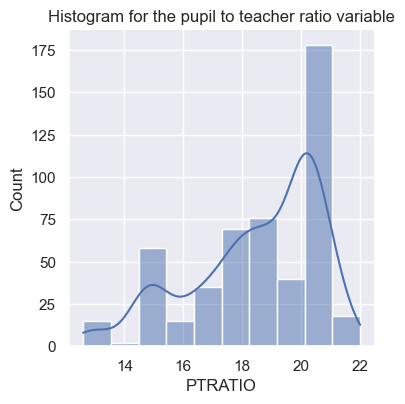

In [234]:
# Histogram for the PTRATIO column.

sns.displot(data=boston_df, x='PTRATIO', bins=10, height=4, aspect=1, kde = True)
plt.title("Histogram for the pupil to teacher ratio variable")

__Conclusion:__<br>
_The distribution is skewed to the left as the tail of the histogram is towards the 12 on the x-axis.<br>
The graph shows a Left-skewed / Negative-skewed distribution._

# Task 5: Use the appropriate tests to answer the questions provided.

### Is there a significant difference in median value of houses bounded by the Charles river or not?<br> (T-test for independent samples)

__Hypothesis:__<br>
 - Null Hypothesis:<br> H<sub>0</sub> : µ<sub>1</sub> = µ<sub>2</sub> : "There is no difference in median value of houses bounded by the Charles river<br>
 - Alternate Hypothesis:<br> H<sub>a</sub> : µ<sub>1</sub> ≠ µ<sub>2</sub> : "There is a difference in median value of houses bounded by the Charles river"

In [235]:
# Run Levene's Test to check test significance

scipy.stats.levene(boston_df['MEDV'], boston_df['CHAS'], center = 'mean')

LeveneResult(statistic=532.6811164157676, pvalue=5.40253511973145e-95)

_Here p-value is less than α-value 0.05_

In [236]:
# Run T-test

scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = False)

Ttest_indResult(statistic=-3.113291312794837, pvalue=0.003567170098137517)

__Conclusion:__<br>
_Since p-value is less than α-value 0.05, <br>
We reject the null hypothesis as <br>
There is enough proof that there is a statistical difference in median value of houses bounded by the Charles river._

### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

One-way ANOVA can't work with continuous variable (AGE), so<br>
We need grouping of AGE variable to represent the data as categorical.<br>
 - 35 years and younger<br>
 - Between 35 and 70 years<br>
 - 70 years and older<br>

In [237]:
# Grouping of AGE data values

boston_df.loc[boston_df['AGE'] <= 35, 'Age_Group'] = "35 and younger"
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'Age_Group'] = "Between 35 and 70"
boston_df.loc[(boston_df['AGE'] >= 70), 'Age_Group'] = "70 and older"

__Hypothesis:__<br>
 - Null Hypothesis:<br> H<sub>0</sub> : µ<sub>1</sub> = µ<sub>2</sub> = µ<sub>3</sub> : "All the three population means are equal"<br>
 - Alternate Hypothesis:<br> H<sub>a</sub> : "At least one of the means differ"

In [238]:
# Run Levene's Test to check for equality of variance

scipy.stats.levene(boston_df[boston_df['Age_Group'] == "35 and younger"]['MEDV'],
                   boston_df[boston_df['Age_Group'] == "Between 35 and 70"]['MEDV'], 
                   boston_df[boston_df['Age_Group'] == "70 and older"]['MEDV'], 
                   center='mean')

LeveneResult(statistic=2.780620029374844, pvalue=0.06295337343259205)

__Remarks:<br>__
_Here p-value is greater than α-value 0.05._

In [239]:
# Separate the three samples (one for each category) assigned to three variables for each one.

thirtyfive_younger = boston_df[boston_df['Age_Group'] == "35 and younger"]['MEDV']
btw_thirtyfive_seventy = boston_df[boston_df['Age_Group'] == "Between 35 and 70"]['MEDV']
seventy_older = boston_df[boston_df['Age_Group'] == "70 and older"]['MEDV']

In [240]:
# Now, run one-way ANOVA.

scipy.stats.f_oneway(thirtyfive_younger, btw_thirtyfive_seventy, seventy_older)

F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)

__Conclusion:__<br>
_Since the p-value is less than α-value 0.05,<br>
We reject the null hypothesis, as there is enough proof that <br>
There is a statistical difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)._

### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

__Hypothesis:__<br>
 - Null Hypothesis:<br> H<sub>0</sub> : "There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town."<br>
 - Alternate Hypothesis:<br> H<sub>a</sub> : "There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town."

In [241]:
# Run Pearson Correlation Test

scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])

PearsonRResult(statistic=0.7636514469209151, pvalue=7.913361061238693e-98)

__Conclusion:__<br>
_Since the p-value is less than α-value 0.05,<br>
We reject the Null hypothesis and conclude that<br>
There exists a relationship between Nitric oxide concentrations and proportion of Non-retail business acres per town._

### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

__Hypothesis:__<br>
 - Null Hypothesis:<br> H<sub>0</sub> : β<sub>1</sub> = 0<br>
"There is no impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes."<br>
 - Alternate Hypothesis : <br> H<sub>a</sub> : β<sub>1</sub> ≠ 0<br>
"There is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes."

In [242]:
# X is the input variables (or independent variables)
X = boston_df['DIS']

# y is the target/dependent variable
y = boston_df['MEDV']

# add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 31 Mar 2023   Prob (F-statistic):           1.21e-08
Time:                        22:38:15   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Conclusion:__
Here, p-value is less than the α-value 0.05, so<br>
We reject the null hypothesis as there is evidence that<br>
There is impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.<br>
The coefficient DIST is positive 1.0916 which also signifies that<br>
The impact increases by 1.0916 when there is an additional weighted distance to the five Boston employment centres.